## Sprawdzam czy środowisko działa poprawnie

In [1]:
import tensorflow
import keras
import numpy
import os
import shutil

import matplotlib.pyplot as pyplot

from keras import models
from keras import layers

from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop, SGD, Adagrad, Adadelta, Adamax, Adam
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix

# Check if libraries work
print("TensorFlow version: " + tensorflow.__version__)
print("Keras version: " + keras.__version__)
print("Numpy version: " + numpy.__version__)

TensorFlow version: 2.12.0
Keras version: 2.12.0
Numpy version: 1.23.5


## Definiuje niezbędne zmienne konfiguracyjne

In [2]:
img_rows = 96
img_cols = 96

_separate_value_small = 500
_separate_value_medium = 750
_separate_value_large = 1000

_globalBatchSize = 25
_globalStepsPerEpoch = 100
_globalEpochAmount = 30
_globalValidationSteps = 100

all_models = []
all_acc = []
all_loss = []
all_val_acc = []
all_val_loss = []

## Definiuje ścieżki do plików

In [3]:
packOneDirectoryName = 'cane'
packTwoDirectoryName = 'cavallo'
packThreeDirectoryName = 'elefante'
packFourDirectoryName = 'faralla'
packFiveDirectoryName = 'gallina'
packSixDirectoryName = 'gatto'
packSevenDirectoryName = 'mucca'
packEightDirectoryName = 'pecora'
packNineDirectoryName = 'rango'
packTenDirectoryName = 'scoiatallo'

packOneFileSchema = 'cane{}.jpeg'
packTwoFileSchema = 'cavalo{}.jpeg'
packThreeFileSchema = 'elefante{}.jpeg'
packFourFileSchema = 'farfalla{}.jpeg'
packFiveFileSchema = 'gallina{}.jpeg'
packSixFileSchema = 'gatto{}.jpeg'
packSevenFileSchema = 'mucca{}.jpeg'
packEightFileSchema = 'pecora{}.jpeg'
packNineFileSchema = 'ragno{}.jpeg'
packTenFileSchema = 'scoittalo{}.jpeg'

saveFileName = 'learningSave.{}.h5'

# Define path to datasets
modelsDirectory = 'C:/ml/models/'
originalDatasetDirectory = 'C:/ml/data/kaggle/original/train'
baseDirectory = 'C:/ml/data/kaggle/processed/cats_and_dogs_small'

# Main Directories
trainDirectory = os.path.join(baseDirectory, 'train')
validationDirectory = os.path.join(baseDirectory, 'validation')
testDirectory = os.path.join(baseDirectory, 'test')

# Train Packs
trainPackOneDirectory = os.path.join(trainDirectory, packOneDirectoryName)
trainPackTwoDirectory = os.path.join(trainDirectory, packTwoDirectoryName)
trainPackThreeDirectory = os.path.join(trainDirectory, packThreeDirectoryName)
trainPackFourDirectory = os.path.join(trainDirectory, packFourDirectoryName)
trainPackFiveDirectory = os.path.join(trainDirectory, packFiveDirectoryName)
trainPackSixDirectory = os.path.join(trainDirectory, packSixDirectoryName)
trainPackSevenDirectory = os.path.join(trainDirectory, packSevenDirectoryName)
trainPackEightDirectory = os.path.join(trainDirectory, packEightDirectoryName)
trainPackNineDirectory = os.path.join(trainDirectory, packNineDirectoryName)
trainPackTenDirectory = os.path.join(trainDirectory, packTenDirectoryName)

# Validation Packs
validationPackOneDirectory = os.path.join(validationDirectory, packOneDirectoryName)
validationPackTwoDirectory = os.path.join(validationDirectory, packTwoDirectoryName)
validationPackThreeDirectory = os.path.join(validationDirectory, packThreeDirectoryName)
validationPackFourDirectory = os.path.join(validationDirectory, packFourDirectoryName)
validationPackFiveDirectory = os.path.join(validationDirectory, packFiveDirectoryName)
validationPackSixDirectory = os.path.join(validationDirectory, packSixDirectoryName)
validationPackSevenDirectory = os.path.join(validationDirectory, packSevenDirectoryName)
validationPackEightDirectory = os.path.join(validationDirectory, packEightDirectoryName)
validationPackNineDirectory = os.path.join(validationDirectory, packNineDirectoryName)
validationPackTenDirectory = os.path.join(validationDirectory, packTenDirectoryName)

# Test Packs
testPackOneDirectory = os.path.join(testDirectory, packOneDirectoryName)
testPackTwoDirectory = os.path.join(testDirectory, packTwoDirectoryName)
testPackThreeDirectory = os.path.join(testDirectory, packThreeDirectoryName)
testPackFourDirectory = os.path.join(testDirectory, packFourDirectoryName)
testPackFiveDirectory = os.path.join(testDirectory, packFiveDirectoryName)
testPackSixDirectory = os.path.join(testDirectory, packSixDirectoryName)
testPackSevenDirectory = os.path.join(testDirectory, packSevenDirectoryName)
testPackEightDirectory = os.path.join(testDirectory, packEightDirectoryName)
testPackNineDirectory = os.path.join(testDirectory, packNineDirectoryName)
testPackTenDirectory = os.path.join(testDirectory, packTenDirectoryName)

## Sprawdzanie czy istnieją ścieżki

In [4]:
if not os.path.exists(trainDirectory):
    os.mkdir(trainDirectory)

if not os.path.exists(validationDirectory):
    os.mkdir(validationDirectory)

if not os.path.exists(testDirectory):
    os.mkdir(testDirectory)

# Train
if not os.path.exists(trainPackOneDirectory):
    os.mkdir(trainPackOneDirectory)

if not os.path.exists(trainPackTwoDirectory):
    os.mkdir(trainPackTwoDirectory)

if not os.path.exists(trainPackThreeDirectory):
    os.mkdir(trainPackThreeDirectory)

if not os.path.exists(trainPackFourDirectory):
    os.mkdir(trainPackFourDirectory)

if not os.path.exists(trainPackFiveDirectory):
    os.mkdir(trainPackFiveDirectory)

if not os.path.exists(trainPackSixDirectory):
    os.mkdir(trainPackSixDirectory)

if not os.path.exists(trainPackSevenDirectory):
    os.mkdir(trainPackSevenDirectory)

if not os.path.exists(trainPackEightDirectory):
    os.mkdir(trainPackEightDirectory)

if not os.path.exists(trainPackNineDirectory):
    os.mkdir(trainPackNineDirectory)

if not os.path.exists(trainPackTenDirectory):
    os.mkdir(trainPackTenDirectory)

# Validation
if not os.path.exists(validationPackOneDirectory):
    os.mkdir(validationPackOneDirectory)

if not os.path.exists(validationPackTwoDirectory):
    os.mkdir(validationPackTwoDirectory)

if not os.path.exists(validationPackThreeDirectory):
    os.mkdir(validationPackThreeDirectory)

if not os.path.exists(validationPackFourDirectory):
    os.mkdir(validationPackFourDirectory)

if not os.path.exists(validationPackFiveDirectory):
    os.mkdir(validationPackFiveDirectory)

if not os.path.exists(validationPackSixDirectory):
    os.mkdir(validationPackSixDirectory)

if not os.path.exists(validationPackSevenDirectory):
    os.mkdir(validationPackSevenDirectory)

if not os.path.exists(validationPackEightDirectory):
    os.mkdir(validationPackEightDirectory)

if not os.path.exists(validationPackNineDirectory):
    os.mkdir(validationPackNineDirectory)

if not os.path.exists(validationPackTenDirectory):
    os.mkdir(validationPackTenDirectory)

# Test
if not os.path.exists(testPackOneDirectory):
    os.mkdir(testPackOneDirectory)

if not os.path.exists(testPackTwoDirectory):
    os.mkdir(testPackTwoDirectory)

if not os.path.exists(testPackThreeDirectory):
    os.mkdir(testPackThreeDirectory)

if not os.path.exists(testPackFourDirectory):
    os.mkdir(testPackFourDirectory)

if not os.path.exists(testPackFiveDirectory):
    os.mkdir(testPackFiveDirectory)

if not os.path.exists(testPackSixDirectory):
    os.mkdir(testPackSixDirectory)

if not os.path.exists(testPackSevenDirectory):
    os.mkdir(testPackSevenDirectory)

if not os.path.exists(testPackEightDirectory):
    os.mkdir(testPackEightDirectory)

if not os.path.exists(testPackNineDirectory):
    os.mkdir(testPackNineDirectory)

if not os.path.exists(testPackTenDirectory):
    os.mkdir(testPackTenDirectory)

## Rozdzielanie plików na poszczególne foldery

In [5]:
# ========================================================================
file_names = [packOneFileSchema.format(i) for i in range(_separate_value_small)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(trainPackOneDirectory, fileName)
    shutil.copy(source, destination)

file_names = [packOneFileSchema.format(i) for i in range(_separate_value_small, _separate_value_medium)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(validationPackOneDirectory, fileName)
    shutil.copy(source, destination)

file_names = [packOneFileSchema.format(i) for i in range(_separate_value_medium, _separate_value_large)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(testPackOneDirectory, fileName)
    shutil.copy(source, destination)

# ========================================================================
file_names = [packTwoFileSchema.format(i) for i in range(_separate_value_small)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(trainPackTwoDirectory, fileName)
    shutil.copy(source, destination)

file_names = [packTwoFileSchema.format(i) for i in range(_separate_value_small, _separate_value_medium)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(validationPackTwoDirectory, fileName)
    shutil.copy(source, destination)

file_names = [packTwoFileSchema.format(i) for i in range(_separate_value_medium, _separate_value_large)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(testPackTwoDirectory, fileName)
    shutil.copy(source, destination)

# ========================================================================
file_names = [packThreeFileSchema.format(i) for i in range(_separate_value_small)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(trainPackThreeDirectory, fileName)
    shutil.copy(source, destination)

file_names = [packThreeFileSchema.format(i) for i in range(_separate_value_small, _separate_value_medium)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(validationPackThreeDirectory, fileName)
    shutil.copy(source, destination)

file_names = [packThreeFileSchema.format(i) for i in range(_separate_value_medium, _separate_value_large)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(testPackThreeDirectory, fileName)
    shutil.copy(source, destination)

# ========================================================================
file_names = [packFourFileSchema.format(i) for i in range(_separate_value_small)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(trainPackFourDirectory, fileName)
    shutil.copy(source, destination)

file_names = [packFourFileSchema.format(i) for i in range(_separate_value_small, _separate_value_medium)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(validationPackFourDirectory, fileName)
    shutil.copy(source, destination)

file_names = [packFourFileSchema.format(i) for i in range(_separate_value_medium, _separate_value_large)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(testPackFourDirectory, fileName)
    shutil.copy(source, destination)

# ========================================================================
file_names = [packFiveFileSchema.format(i) for i in range(_separate_value_small)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(trainPackFiveDirectory, fileName)
    shutil.copy(source, destination)

file_names = [packFiveFileSchema.format(i) for i in range(_separate_value_small, _separate_value_medium)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(validationPackFiveDirectory, fileName)
    shutil.copy(source, destination)

file_names = [packFiveFileSchema.format(i) for i in range(_separate_value_medium, _separate_value_large)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(testPackFiveDirectory, fileName)
    shutil.copy(source, destination)

# ========================================================================
file_names = [packSixFileSchema.format(i) for i in range(_separate_value_small)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(trainPackSixDirectory, fileName)
    shutil.copy(source, destination)

file_names = [packSixFileSchema.format(i) for i in range(_separate_value_small, _separate_value_medium)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(validationPackSixDirectory, fileName)
    shutil.copy(source, destination)

file_names = [packSixFileSchema.format(i) for i in range(_separate_value_medium, _separate_value_large)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(testPackSixDirectory, fileName)
    shutil.copy(source, destination)

# ========================================================================
file_names = [packSevenFileSchema.format(i) for i in range(_separate_value_small)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(trainPackSevenDirectory, fileName)
    shutil.copy(source, destination)

file_names = [packSevenFileSchema.format(i) for i in range(_separate_value_small, _separate_value_medium)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(validationPackSevenDirectory, fileName)
    shutil.copy(source, destination)

file_names = [packSevenFileSchema.format(i) for i in range(_separate_value_medium, _separate_value_large)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(testPackSevenDirectory, fileName)
    shutil.copy(source, destination)

# ========================================================================
file_names = [packEightFileSchema.format(i) for i in range(_separate_value_small)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(trainPackEightDirectory, fileName)
    shutil.copy(source, destination)

file_names = [packEightFileSchema.format(i) for i in range(_separate_value_small, _separate_value_medium)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(validationPackEightDirectory, fileName)
    shutil.copy(source, destination)

file_names = [packEightFileSchema.format(i) for i in range(_separate_value_medium, _separate_value_large)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(testPackEightDirectory, fileName)
    shutil.copy(source, destination)

# ========================================================================
file_names = [packNineFileSchema.format(i) for i in range(_separate_value_small)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(trainPackNineDirectory, fileName)
    shutil.copy(source, destination)

file_names = [packNineFileSchema.format(i) for i in range(_separate_value_small, _separate_value_medium)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(validationPackNineDirectory, fileName)
    shutil.copy(source, destination)

file_names = [packNineFileSchema.format(i) for i in range(_separate_value_medium, _separate_value_large)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(testPackNineDirectory, fileName)
    shutil.copy(source, destination)

# ========================================================================
file_names = [packTenFileSchema.format(i) for i in range(_separate_value_small)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(trainPackTenDirectory, fileName)
    shutil.copy(source, destination)

file_names = [packTenFileSchema.format(i) for i in range(_separate_value_small, _separate_value_medium)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(validationPackTenDirectory, fileName)
    shutil.copy(source, destination)

file_names = [packTenFileSchema.format(i) for i in range(_separate_value_medium, _separate_value_large)]
for fileName in file_names:
    source = os.path.join(originalDatasetDirectory, fileName)
    destination = os.path.join(testPackTenDirectory, fileName)
    shutil.copy(source, destination)

## Definiuje funkcję odpowiedzialną za tworzenie wykresy

In [6]:
def plot_accuracy(accuracy, val_accuracy, loss, val_loss, cm, lab='*'):  # Create plot
    epochs = range(len(accuracy))
    local_fig, local_axes = pyplot.subplots(3, 1, figsize=(8, 12))

    local_axes[0].plot(epochs, accuracy, color='green', label='Training accuracy ' + lab)
    local_axes[0].plot(epochs, val_accuracy, color='blue', label='Validation accuracy ' + lab)
    local_axes[0].set_title('Comparison of Training')
    local_axes[0].set_xlabel('Epochs')
    local_axes[0].set_ylabel('Accuracy')
    local_axes[0].legend(['Train', 'Test'], loc='upper left')

    local_axes[1].plot(epochs, loss, color='green', label='Training loss for ' + lab)
    local_axes[1].plot(epochs, val_loss, 'blue', label='Validation loss for ' + lab)
    local_axes[1].set_title('Comparison of Training and Validation Losses')
    local_axes[1].set_xlabel('Epochs')
    local_axes[1].set_ylabel('Loss')
    local_axes[1].legend(['Train', 'Test'], loc='upper left')

    local_axes[2].imshow(cm, cmap='Blues')
    local_axes[2].set_title("Confusion Matrix")
    local_axes[2].set_xlabel("Predicted Class")
    local_axes[2].set_ylabel("True Class")
    local_axes[2].grid(False)
    for i in range(len(cm)):
        for j in range(len(cm)):
            local_axes[2].text(j, i, cm[i, j], ha='center', va='center', color='black')

    pyplot.tight_layout()
    pyplot.show()

## Definiuje funkcję odpowiedzialną za tworzenie Confusion Matrix

In [7]:
def new_confusion_matrix(model, validation_generator):
    validation_images = []
    validation_labels = []
    validation_generator.reset()

    while len(validation_images) < 1000:
        images, labels = validation_generator.next()
        for image in images:
            validation_images.append(numpy.array(image))
        validation_labels.extend(labels)
        if len(validation_images) >= 1000:
            break

    validation_images = numpy.array(validation_images)
    validation_labels = numpy.array(validation_labels)
    validation_labels = numpy.argmax(validation_labels, axis=1)

    predictions = model.predict(validation_images)
    predicted_labels = numpy.argmax(predictions, axis=1)

    temp_confusion_matrix = confusion_matrix(validation_labels, predicted_labels)

    return temp_confusion_matrix

## Model RMS

In [8]:
ModelRMS_01 = models.Sequential()
ModelRMS_01.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
ModelRMS_01.add(layers.MaxPooling2D((2, 2)))
ModelRMS_01.add(layers.Conv2D(64, (3, 3), activation='relu'))
ModelRMS_01.add(layers.MaxPooling2D((2, 2)))
ModelRMS_01.add(layers.Conv2D(128, (3, 3), activation='relu'))
ModelRMS_01.add(layers.MaxPooling2D((2, 2)))
ModelRMS_01.add(layers.Flatten())
ModelRMS_01.add(layers.Dense(256, activation='relu'))
ModelRMS_01.add(layers.Dense(10, activation='softmax'))

ModelRMS_01.summary()

ModelRMS_01.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

In [9]:
trainDataGenRMS_01 = ImageDataGenerator(rescale=1. / 255)
testDataGenRMS_01 = ImageDataGenerator(rescale=1. / 255)

trainGeneratorRMS_01 = trainDataGenRMS_01.flow_from_directory(
    trainDirectory,
    target_size=(img_rows, img_cols),
    batch_size=_globalBatchSize,
    class_mode='categorical'
)

validationGeneratorRMS_01 = testDataGenRMS_01.flow_from_directory(
    validationDirectory,
    target_size=(img_rows, img_cols),
    batch_size=_globalBatchSize,
    class_mode='categorical'
)

historyRMS_01 = ModelRMS_01.fit(
    trainGeneratorRMS_01,
    steps_per_epoch=_globalStepsPerEpoch,
    epochs=_globalEpochAmount,
    validation_data=validationGeneratorRMS_01,
    validation_steps=_globalValidationSteps
)



Found 5300 images belonging to 10 classes.
Found 2950 images belonging to 10 classes.
Epoch 1/30
100/100 [==============================] - 26s 257ms/step - loss: 2.2543 - acc: 0.1564 - val_loss: 2.1503 - val_acc: 0.2716
Epoch 2/30
100/100 [==============================] - 16s 160ms/step - loss: 2.0435 - acc: 0.2764 - val_loss: 1.9506 - val_acc: 0.3228
Epoch 3/30
100/100 [==============================] - 13s 125ms/step - loss: 1.8999 - acc: 0.3344 - val_loss: 1.8775 - val_acc: 0.3180
Epoch 4/30
100/100 [==============================] - 12s 121ms/step - loss: 1.8137 - acc: 0.3556 - val_loss: 1.8330 - val_acc: 0.3320
Epoch 5/30
100/100 [==============================] - 12s 124ms/step - loss: 1.7350 - acc: 0.4000 - val_loss: 1.8198 - val_acc: 0.3504
Epoch 6/30
100/100 [==============================] - 12s 123ms/step - loss: 1.6672 - acc: 0.4340 - val_loss: 1.6878 - val_acc: 0.4056
Epoch 7/30
100/100 [==============================] - 13s 126ms/step - loss: 1.6178 - acc: 0.4392 - val_

32/32 [==============================] - 1s 25ms/step


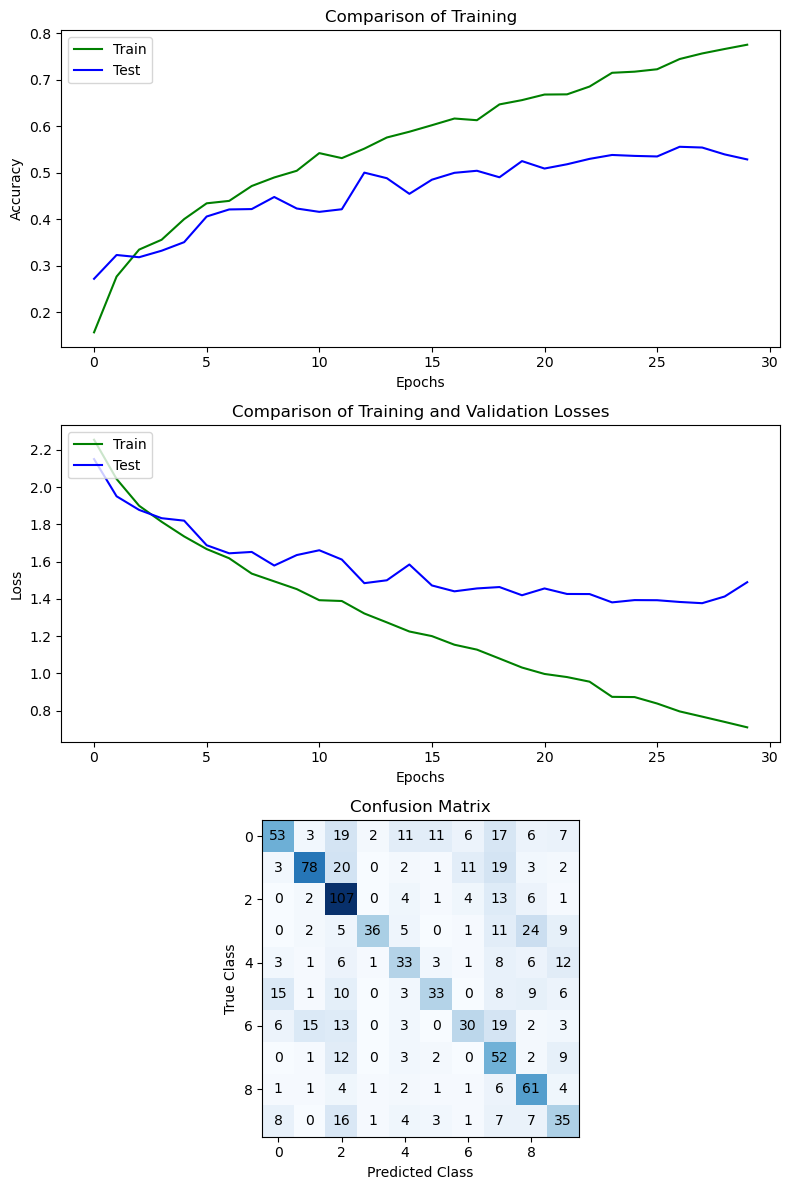

In [10]:
# Save Output
ModelRMS_01.save(modelsDirectory + saveFileName.format('RMS_01'))

# Save history for later
accuracyRMS_01 = historyRMS_01.history['acc']
val_accuracyRMS_01 = historyRMS_01.history['val_acc']
lossRMS_01 = historyRMS_01.history['loss']
val_lossRMS_01 = historyRMS_01.history['val_loss']

# Create confusion matrix
confusion_matrixRMS_01 = new_confusion_matrix(ModelRMS_01, validationGeneratorRMS_01)

# Create plots
plot_accuracy(
    accuracyRMS_01,
    val_accuracyRMS_01,
    lossRMS_01,
    val_lossRMS_01,
    confusion_matrixRMS_01,
    lab='ModelRMS_01'
)  

## Model Adam

In [11]:
ModelADAM_01 = models.Sequential()
ModelADAM_01.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
ModelADAM_01.add(layers.MaxPooling2D((2, 2)))
ModelADAM_01.add(layers.Conv2D(64, (3, 3), activation='relu'))
ModelADAM_01.add(layers.MaxPooling2D((2, 2)))
ModelADAM_01.add(layers.Conv2D(128, (3, 3), activation='relu'))
ModelADAM_01.add(layers.MaxPooling2D((2, 2)))
ModelADAM_01.add(layers.Flatten())
ModelADAM_01.add(layers.Dense(256, activation='relu'))
ModelADAM_01.add(layers.Dense(10, activation='softmax'))

ModelADAM_01.summary()

ModelADAM_01.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['acc']
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 128)     

In [12]:
trainDataGenAdam_01 = ImageDataGenerator(rescale=1. / 255)
testDataGenAdam_01 = ImageDataGenerator(rescale=1. / 255)

trainGeneratorADAM_01 = trainDataGenAdam_01.flow_from_directory(
    trainDirectory,
    target_size=(img_rows, img_cols),
    batch_size=_globalBatchSize,
    class_mode='categorical'
)

validationGeneratorADAM_01 = testDataGenAdam_01.flow_from_directory(
    validationDirectory,
    target_size=(img_rows, img_cols),
    batch_size=_globalBatchSize,
    class_mode='categorical'
)

historyADAM_01 = ModelADAM_01.fit(
    trainGeneratorADAM_01,
    steps_per_epoch=_globalStepsPerEpoch,
    epochs=_globalEpochAmount,
    validation_data=validationGeneratorADAM_01,
    validation_steps=_globalValidationSteps
)

Found 5300 images belonging to 10 classes.
Found 2950 images belonging to 10 classes.
Epoch 1/30
100/100 [==============================] - 12s 115ms/step - loss: 2.2737 - acc: 0.1448 - val_loss: 2.1755 - val_acc: 0.2228
Epoch 2/30
100/100 [==============================] - 11s 115ms/step - loss: 2.0609 - acc: 0.2756 - val_loss: 1.9157 - val_acc: 0.3180
Epoch 3/30
100/100 [==============================] - 12s 116ms/step - loss: 1.8905 - acc: 0.3396 - val_loss: 1.8388 - val_acc: 0.3368
Epoch 4/30
100/100 [==============================] - 12s 116ms/step - loss: 1.7793 - acc: 0.3704 - val_loss: 1.7993 - val_acc: 0.3568
Epoch 5/30
100/100 [==============================] - 11s 114ms/step - loss: 1.7030 - acc: 0.4092 - val_loss: 1.7386 - val_acc: 0.3740
Epoch 6/30
100/100 [==============================] - 11s 114ms/step - loss: 1.6068 - acc: 0.4396 - val_loss: 1.7720 - val_acc: 0.3672
Epoch 7/30
100/100 [==============================] - 11s 115ms/step - loss: 1.5673 - acc: 0.4620 - val_

32/32 [==============================] - 1s 24ms/step


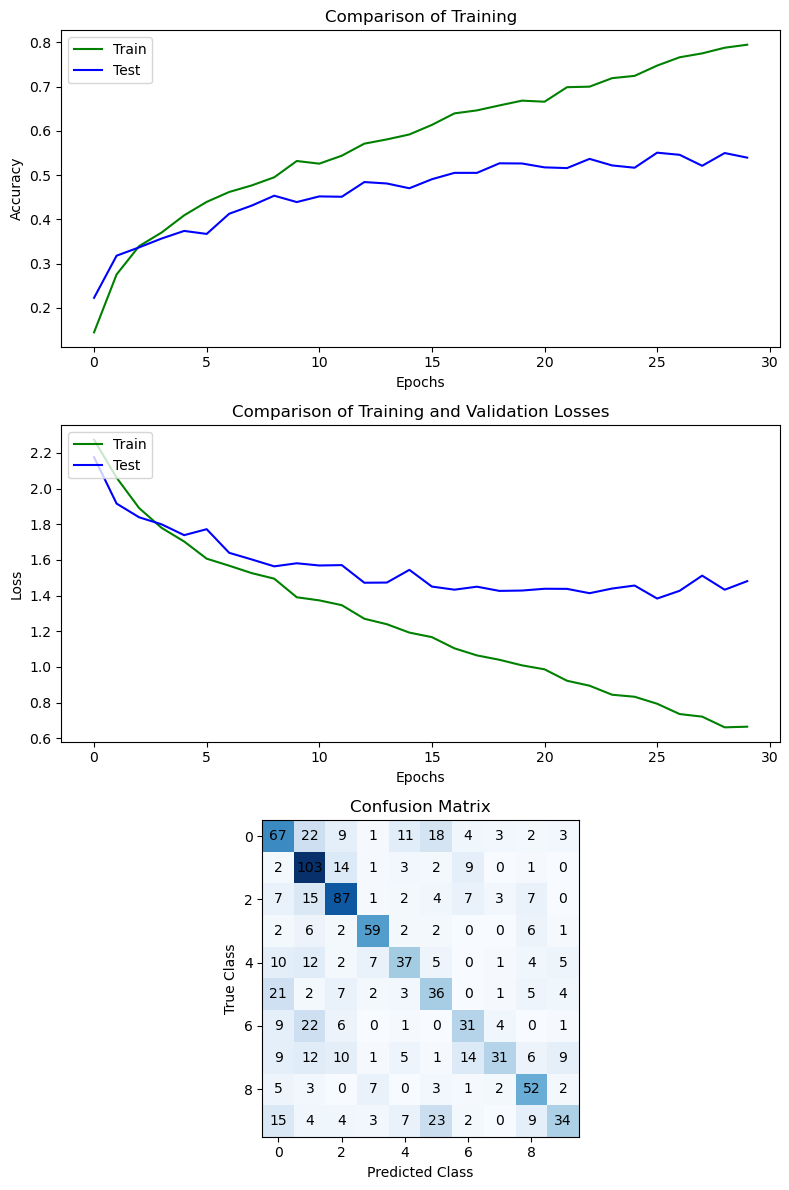

In [13]:
# Save Output
ModelADAM_01.save(modelsDirectory + saveFileName.format('ADAM_01'))

accuracyADAM_01 = historyADAM_01.history['acc']
val_accuracyADAM_01 = historyADAM_01.history['val_acc']
lossADAM_01 = historyADAM_01.history['loss']
val_lossADAM_01 = historyADAM_01.history['val_loss']

confusion_matrixADAM_01 = new_confusion_matrix(ModelADAM_01, validationGeneratorADAM_01)

plot_accuracy(
    accuracyADAM_01,
    val_accuracyADAM_01,
    lossADAM_01,
    val_lossADAM_01,
    confusion_matrixADAM_01,
    lab='ADAM_01'
)

# History
all_models.append('ADAM_01')
all_acc.append(max(historyADAM_01.history['acc']))
all_loss.append(min(historyADAM_01.history['loss']))
all_val_acc.append(max(historyADAM_01.history['val_acc']))
all_val_loss.append(min(historyADAM_01.history['val_loss']))

## SDG

In [14]:
ModelSDG_01 = models.Sequential()
ModelSDG_01.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
ModelSDG_01.add(layers.MaxPooling2D((2, 2)))
ModelSDG_01.add(layers.Conv2D(64, (3, 3), activation='relu'))
ModelSDG_01.add(layers.MaxPooling2D((2, 2)))
ModelSDG_01.add(layers.Conv2D(128, (3, 3), activation='relu'))
ModelSDG_01.add(layers.MaxPooling2D((2, 2)))
ModelSDG_01.add(layers.Flatten())
ModelSDG_01.add(layers.Dense(256, activation='relu'))
ModelSDG_01.add(layers.Dense(10, activation='softmax'))

ModelSDG_01.summary()

ModelSDG_01.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    metrics=['acc']
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 10, 128)     

In [15]:
trainDataGenSDG_01 = ImageDataGenerator(rescale=1. / 255)
testDataGenSDG_01 = ImageDataGenerator(rescale=1. / 255)

trainGeneratorSDG_01 = trainDataGenSDG_01.flow_from_directory(
    trainDirectory,
    target_size=(img_rows, img_cols),
    batch_size=_globalBatchSize,
    class_mode='categorical'
)

validationGeneratorSDG_01 = testDataGenSDG_01.flow_from_directory(
    validationDirectory,
    target_size=(img_rows, img_cols),
    batch_size=_globalBatchSize,
    class_mode='categorical'
)

historySDG_01 = ModelSDG_01.fit(
    trainGeneratorSDG_01,
    steps_per_epoch=_globalStepsPerEpoch,
    epochs=_globalEpochAmount,
    validation_data=validationGeneratorSDG_01,
    validation_steps=_globalValidationSteps
)

Found 5300 images belonging to 10 classes.
Found 2950 images belonging to 10 classes.
Epoch 1/30
100/100 [==============================] - 12s 118ms/step - loss: 2.2810 - acc: 0.1436 - val_loss: 2.2064 - val_acc: 0.2112
Epoch 2/30
100/100 [==============================] - 12s 118ms/step - loss: 2.0942 - acc: 0.2444 - val_loss: 1.9832 - val_acc: 0.2652
Epoch 3/30
100/100 [==============================] - 12s 118ms/step - loss: 1.9775 - acc: 0.2788 - val_loss: 1.8818 - val_acc: 0.3188
Epoch 4/30
100/100 [==============================] - 11s 115ms/step - loss: 1.8771 - acc: 0.3380 - val_loss: 1.8733 - val_acc: 0.3256
Epoch 5/30
100/100 [==============================] - 11s 115ms/step - loss: 1.7415 - acc: 0.3700 - val_loss: 1.8060 - val_acc: 0.3496
Epoch 6/30
100/100 [==============================] - 11s 115ms/step - loss: 1.6650 - acc: 0.4180 - val_loss: 1.7096 - val_acc: 0.3888
Epoch 7/30
100/100 [==============================] - 11s 114ms/step - loss: 1.5497 - acc: 0.4644 - val_

32/32 [==============================] - 1s 24ms/step


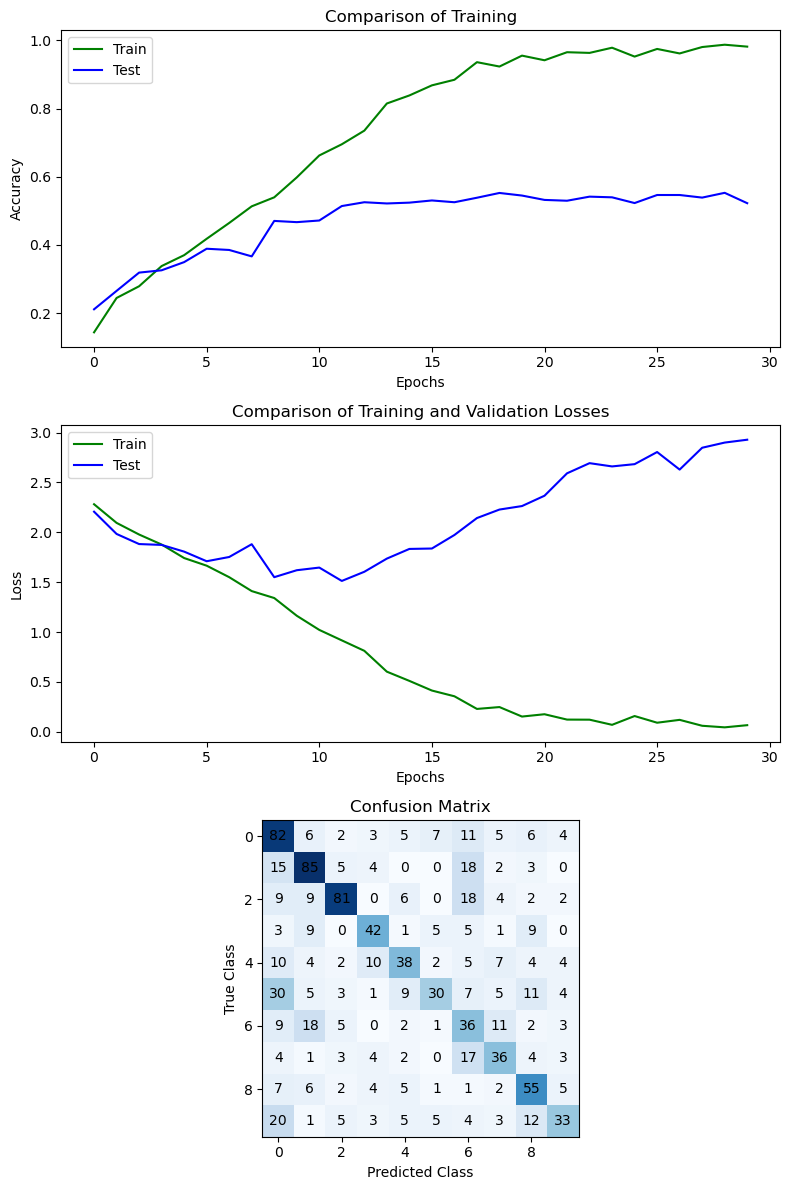

In [16]:
    ModelSDG_01.save(modelsDirectory + saveFileName.format('SDG_01'))

    accuracySDG_01 = historySDG_01.history['acc']
    val_accuracySDG_01 = historySDG_01.history['val_acc']
    lossSDG_01 = historySDG_01.history['loss']
    val_lossSDG_01 = historySDG_01.history['val_loss']

    confusion_matrixSDG_01 = new_confusion_matrix(ModelSDG_01, validationGeneratorSDG_01)

    plot_accuracy(
        accuracySDG_01,
        val_accuracySDG_01,
        lossSDG_01,
        val_lossSDG_01,
        confusion_matrixSDG_01,
        lab='SDG_01'
    )

    # History
    all_models.append('SDG_01')
    all_acc.append(max(historySDG_01.history['acc']))
    all_loss.append(min(historySDG_01.history['loss']))
    all_val_acc.append(max(historySDG_01.history['val_acc']))
    all_val_loss.append(min(historySDG_01.history['val_loss']))

## Adadelta

In [17]:
ModelADADELTA_01 = models.Sequential()
ModelADADELTA_01.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
ModelADADELTA_01.add(layers.MaxPooling2D((2, 2)))
ModelADADELTA_01.add(layers.Conv2D(64, (3, 3), activation='relu'))
ModelADADELTA_01.add(layers.MaxPooling2D((2, 2)))
ModelADADELTA_01.add(layers.Conv2D(128, (3, 3), activation='relu'))
ModelADADELTA_01.add(layers.MaxPooling2D((2, 2)))
ModelADADELTA_01.add(layers.Flatten())
ModelADADELTA_01.add(layers.Dense(256, activation='relu'))
ModelADADELTA_01.add(layers.Dense(10, activation='softmax'))

ModelADADELTA_01.summary()

ModelADADELTA_01.compile(
    loss='categorical_crossentropy',
    optimizer=Adadelta(learning_rate=1.0),
    metrics=['acc']
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 10, 10, 128)     

In [18]:
trainDataGenADADELTA_01 = ImageDataGenerator(rescale=1. / 255)
testDataGenADADELTA_01 = ImageDataGenerator(rescale=1. / 255)

trainGeneratorADADELTA_01 = trainDataGenADADELTA_01.flow_from_directory(
    trainDirectory,
    target_size=(img_rows, img_cols),
    batch_size=_globalBatchSize,
    class_mode='categorical'
)

validationGeneratorADADELTA_01 = testDataGenADADELTA_01.flow_from_directory(
    validationDirectory,
    target_size=(img_rows, img_cols),
    batch_size=_globalBatchSize,
    class_mode='categorical'
)

historyADADELTA_01 = ModelADADELTA_01.fit(
    trainGeneratorADADELTA_01,
    steps_per_epoch=_globalStepsPerEpoch,
    epochs=_globalEpochAmount,
    validation_data=validationGeneratorADADELTA_01,
    validation_steps=_globalValidationSteps
)

Found 5300 images belonging to 10 classes.
Found 2950 images belonging to 10 classes.
Epoch 1/30
100/100 [==============================] - 12s 118ms/step - loss: 2.2636 - acc: 0.1476 - val_loss: 2.0808 - val_acc: 0.2392
Epoch 2/30
100/100 [==============================] - 12s 119ms/step - loss: 2.0409 - acc: 0.2552 - val_loss: 1.9984 - val_acc: 0.2608
Epoch 3/30
100/100 [==============================] - 11s 115ms/step - loss: 1.8375 - acc: 0.3436 - val_loss: 1.7610 - val_acc: 0.3764
Epoch 4/30
100/100 [==============================] - 12s 116ms/step - loss: 1.6759 - acc: 0.4124 - val_loss: 1.6169 - val_acc: 0.4052
Epoch 5/30
100/100 [==============================] - 12s 116ms/step - loss: 1.5058 - acc: 0.4792 - val_loss: 1.5300 - val_acc: 0.4640
Epoch 6/30
100/100 [==============================] - 11s 114ms/step - loss: 1.3661 - acc: 0.5396 - val_loss: 1.6206 - val_acc: 0.4480
Epoch 7/30
100/100 [==============================] - 12s 116ms/step - loss: 1.2233 - acc: 0.5832 - val_

32/32 [==============================] - 1s 24ms/step


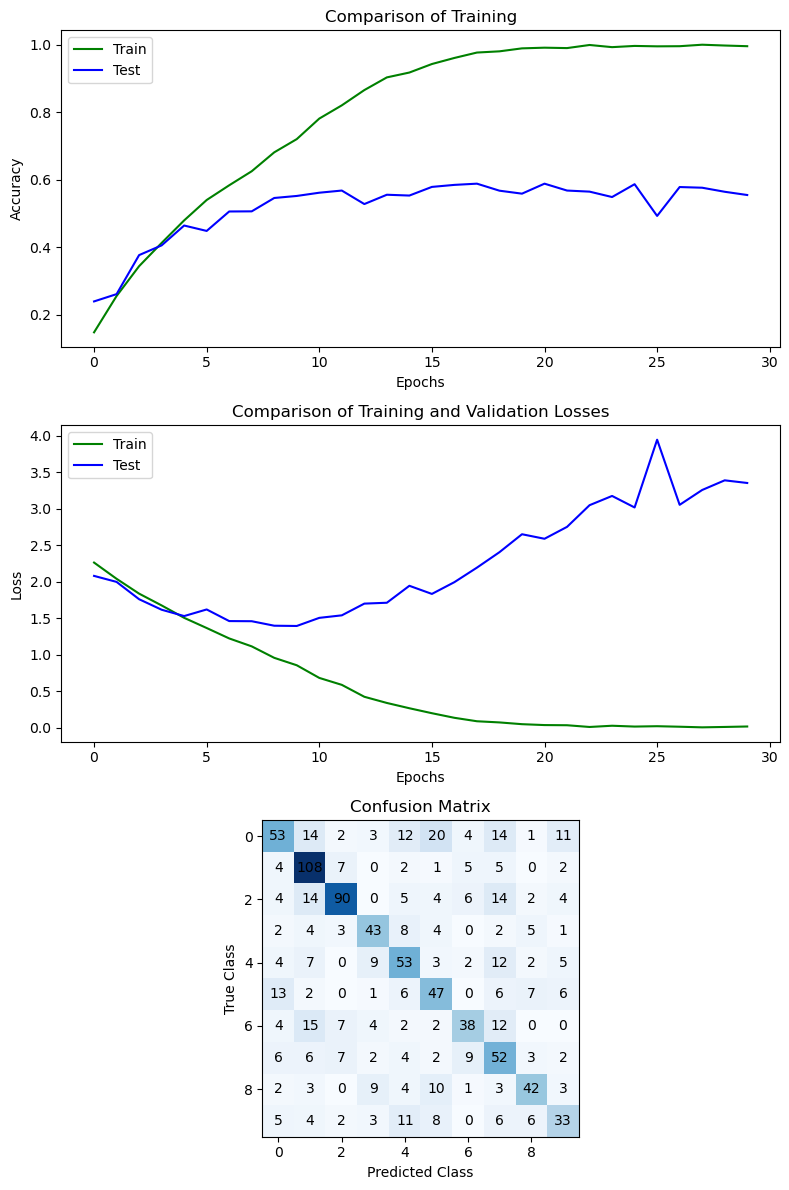

In [19]:
ModelADADELTA_01.save(modelsDirectory + saveFileName.format('ADADELTA_01'))

accuracyADADELTA_01 = historyADADELTA_01.history['acc']
val_accuracyADADELTA_01 = historyADADELTA_01.history['val_acc']
lossADADELTA_01 = historyADADELTA_01.history['loss']
val_lossADADELTA_01 = historyADADELTA_01.history['val_loss']

confusion_matrixADADELTA_01 = new_confusion_matrix(ModelADADELTA_01, validationGeneratorADADELTA_01)

plot_accuracy(
    accuracyADADELTA_01,
    val_accuracyADADELTA_01,
    lossADADELTA_01,
    val_lossADADELTA_01,
    confusion_matrixADADELTA_01,
    lab='ADADELTA_01'
)

# History
all_models.append('ADADELTA_01')
all_acc.append(max(historyADADELTA_01.history['acc']))
all_loss.append(min(historyADADELTA_01.history['loss']))
all_val_acc.append(max(historyADADELTA_01.history['val_acc']))
all_val_loss.append(min(historyADADELTA_01.history['val_loss']))

## Adagrad

In [20]:
ModelADAGRAD_01 = models.Sequential()
ModelADAGRAD_01.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
ModelADAGRAD_01.add(layers.MaxPooling2D((2, 2)))
ModelADAGRAD_01.add(layers.Conv2D(64, (3, 3), activation='relu'))
ModelADAGRAD_01.add(layers.MaxPooling2D((2, 2)))
ModelADAGRAD_01.add(layers.Conv2D(128, (3, 3), activation='relu'))
ModelADAGRAD_01.add(layers.MaxPooling2D((2, 2)))
ModelADAGRAD_01.add(layers.Flatten())
ModelADAGRAD_01.add(layers.Dense(256, activation='relu'))
ModelADAGRAD_01.add(layers.Dense(10, activation='softmax'))

ModelADAGRAD_01.summary()

ModelADAGRAD_01.compile(
    loss='categorical_crossentropy',
    optimizer=Adagrad(learning_rate=0.01),
    metrics=['acc']
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 10, 10, 128)     

In [21]:
trainDataGenADAGRAD_01 = ImageDataGenerator(rescale=1. / 255)
testDataGenADAGRAD_01 = ImageDataGenerator(rescale=1. / 255)

trainGeneratorADAGRAD_01 = trainDataGenADAGRAD_01.flow_from_directory(
    trainDirectory,
    target_size=(img_rows, img_cols),
    batch_size=_globalBatchSize,
    class_mode='categorical'
)

validationGeneratorADAGRAD_01 = testDataGenADAGRAD_01.flow_from_directory(
    validationDirectory,
    target_size=(img_rows, img_cols),
    batch_size=_globalBatchSize,
    class_mode='categorical'
)

historyADAGRAD_01 = ModelADAGRAD_01.fit(
    trainGeneratorADAGRAD_01,
    steps_per_epoch=_globalStepsPerEpoch,
    epochs=_globalEpochAmount,
    validation_data=validationGeneratorADAGRAD_01,
    validation_steps=_globalValidationSteps
)

Found 5300 images belonging to 10 classes.
Found 2950 images belonging to 10 classes.
Epoch 1/30
100/100 [==============================] - 12s 114ms/step - loss: 2.2932 - acc: 0.1204 - val_loss: 2.2634 - val_acc: 0.1504
Epoch 2/30
100/100 [==============================] - 12s 115ms/step - loss: 2.2293 - acc: 0.1848 - val_loss: 2.1857 - val_acc: 0.1948
Epoch 3/30
100/100 [==============================] - 11s 114ms/step - loss: 2.1077 - acc: 0.2364 - val_loss: 2.0246 - val_acc: 0.2612
Epoch 4/30
100/100 [==============================] - 11s 113ms/step - loss: 1.9925 - acc: 0.2796 - val_loss: 1.9378 - val_acc: 0.2888
Epoch 5/30
100/100 [==============================] - 12s 116ms/step - loss: 1.8849 - acc: 0.3296 - val_loss: 1.9450 - val_acc: 0.2908
Epoch 6/30
100/100 [==============================] - 11s 113ms/step - loss: 1.8151 - acc: 0.3556 - val_loss: 1.8369 - val_acc: 0.3320
Epoch 7/30
100/100 [==============================] - 12s 115ms/step - loss: 1.7254 - acc: 0.3916 - val_

32/32 [==============================] - 1s 24ms/step


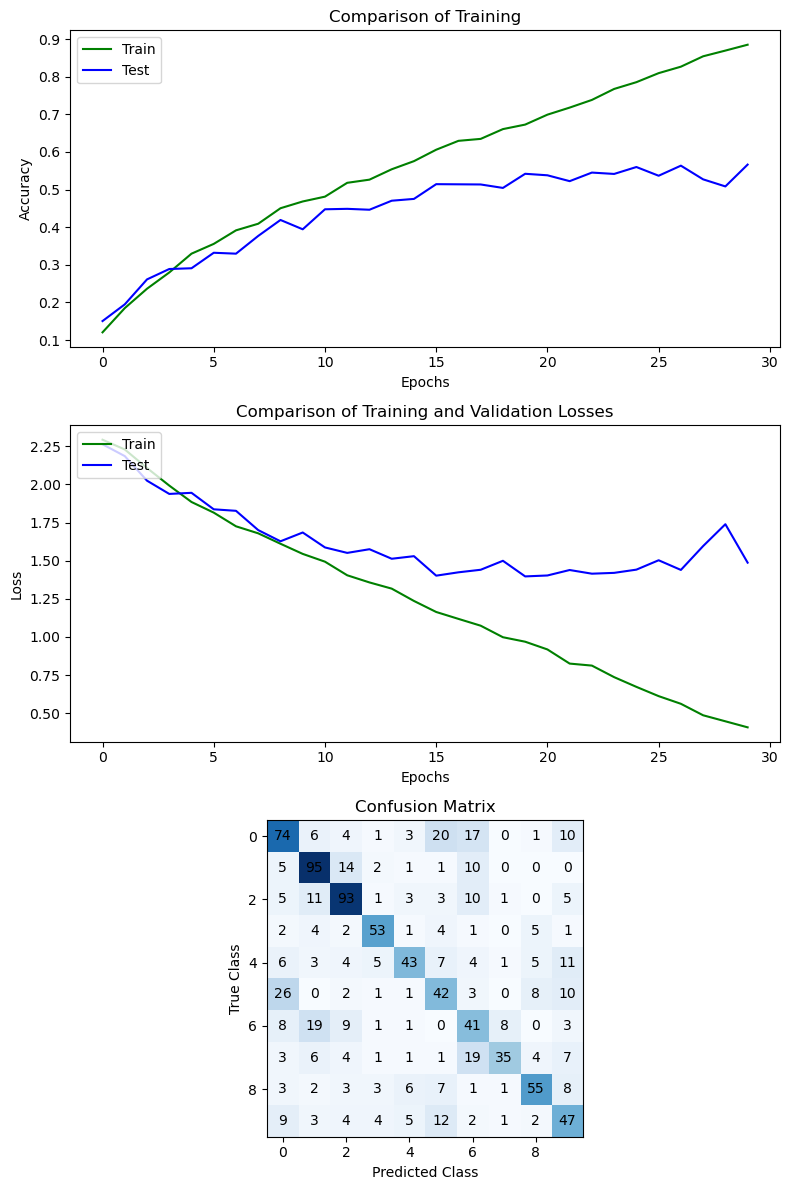

In [22]:
ModelADAGRAD_01.save(modelsDirectory + saveFileName.format("ADAGRAD_01"))

accuracyADAGRAD_01 = historyADAGRAD_01.history['acc']
val_accuracyADAGRAD_01 = historyADAGRAD_01.history['val_acc']
lossADAGRAD_01 = historyADAGRAD_01.history['loss']
val_lossADAGRAD_01 = historyADAGRAD_01.history['val_loss']

confusion_matrixADAGRAD_01 = new_confusion_matrix(ModelADAGRAD_01, validationGeneratorADAGRAD_01)

plot_accuracy(
    accuracyADAGRAD_01,
    val_accuracyADAGRAD_01,
    lossADAGRAD_01,
    val_lossADAGRAD_01,
    confusion_matrixADAGRAD_01,
    lab='ADAGRAD_01'
)

# History
all_models.append('ADAGRAD_01')
all_acc.append(max(historyADAGRAD_01.history['acc']))
all_loss.append(min(historyADAGRAD_01.history['loss']))
all_val_acc.append(max(historyADAGRAD_01.history['val_acc']))
all_val_loss.append(min(historyADAGRAD_01.history['val_loss']))

## ADAMAX

In [23]:
ModelADAMAX_01 = models.Sequential()
ModelADAMAX_01.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
ModelADAMAX_01.add(layers.MaxPooling2D((2, 2)))
ModelADAMAX_01.add(layers.Conv2D(64, (3, 3), activation='relu'))
ModelADAMAX_01.add(layers.MaxPooling2D((2, 2)))
ModelADAMAX_01.add(layers.Conv2D(128, (3, 3), activation='relu'))
ModelADAMAX_01.add(layers.MaxPooling2D((2, 2)))
ModelADAMAX_01.add(layers.Flatten())
ModelADAMAX_01.add(layers.Dense(256, activation='relu'))
ModelADAMAX_01.add(layers.Dense(10, activation='softmax'))

ModelADAMAX_01.summary()

ModelADAMAX_01.compile(
    loss='categorical_crossentropy',
    optimizer=Adamax(learning_rate=0.002),
    metrics=['acc']
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 10, 10, 128)     

In [24]:
trainDataGenADAMAX_01 = ImageDataGenerator(rescale=1. / 255)
testDataGenADAMAX_01 = ImageDataGenerator(rescale=1. / 255)

trainGeneratorADAMAX_01 = trainDataGenADAMAX_01.flow_from_directory(
    trainDirectory,
    target_size=(img_rows, img_cols),
    batch_size=_globalBatchSize,
    class_mode='categorical'
)

validationGeneratorADAMAX_01 = testDataGenADAMAX_01.flow_from_directory(
    validationDirectory,
    target_size=(img_rows, img_cols),
    batch_size=_globalBatchSize,
    class_mode='categorical'
)

historyADAMAX_01 = ModelADAMAX_01.fit(
    trainGeneratorADAMAX_01,
    steps_per_epoch=_globalStepsPerEpoch,
    epochs=_globalEpochAmount,
    validation_data=validationGeneratorADAMAX_01,
    validation_steps=_globalValidationSteps
)

Found 5300 images belonging to 10 classes.
Found 2950 images belonging to 10 classes.
Epoch 1/30
100/100 [==============================] - 12s 116ms/step - loss: 2.2432 - acc: 0.1888 - val_loss: 1.9881 - val_acc: 0.3008
Epoch 2/30
100/100 [==============================] - 11s 112ms/step - loss: 1.8860 - acc: 0.3204 - val_loss: 1.7593 - val_acc: 0.3696
Epoch 3/30
100/100 [==============================] - 11s 113ms/step - loss: 1.6376 - acc: 0.4304 - val_loss: 1.6694 - val_acc: 0.4100
Epoch 4/30
100/100 [==============================] - 12s 117ms/step - loss: 1.5419 - acc: 0.4712 - val_loss: 1.5644 - val_acc: 0.4536
Epoch 5/30
100/100 [==============================] - 12s 116ms/step - loss: 1.4208 - acc: 0.5112 - val_loss: 1.5639 - val_acc: 0.4424
Epoch 6/30
100/100 [==============================] - 12s 119ms/step - loss: 1.2852 - acc: 0.5456 - val_loss: 1.5016 - val_acc: 0.4628
Epoch 7/30
100/100 [==============================] - 12s 117ms/step - loss: 1.1768 - acc: 0.6036 - val_

32/32 [==============================] - 1s 24ms/step


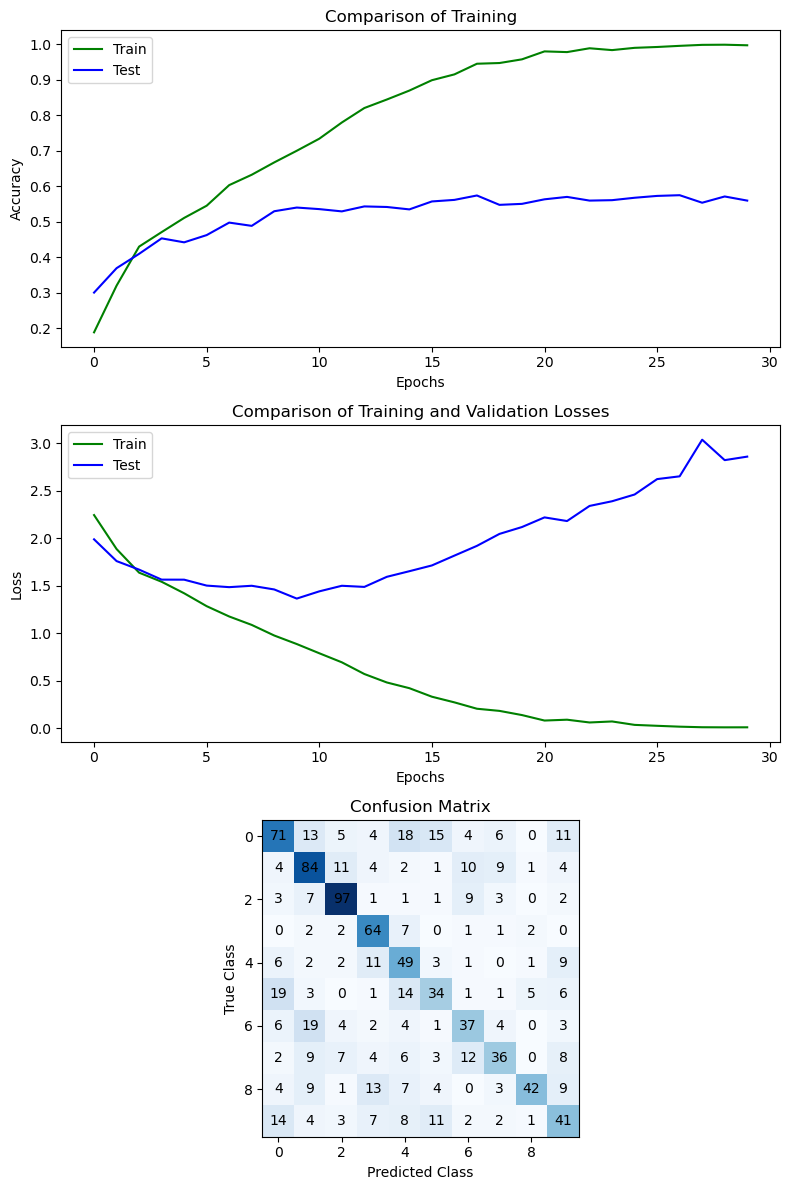

In [25]:
ModelADAMAX_01.save(modelsDirectory + saveFileName.format('ADAMAX_01'))

accuracyADAMAX_01 = historyADAMAX_01.history['acc']
val_accuracyADAMAX_01 = historyADAMAX_01.history['val_acc']
lossADAMAX_01 = historyADAMAX_01.history['loss']
val_lossADAMAX_01 = historyADAMAX_01.history['val_loss']

confusion_matrixADAMAX_01 = new_confusion_matrix(ModelADAMAX_01, validationGeneratorADAMAX_01)

plot_accuracy(
    accuracyADAMAX_01,
    val_accuracyADAMAX_01,
    lossADAMAX_01,
    val_lossADAMAX_01,
    confusion_matrixADAMAX_01,
    lab='ADAMAX_01'
)

# History
all_models.append('ADAMAX_01')
all_acc.append(max(historyADAMAX_01.history['acc']))
all_loss.append(min(historyADAMAX_01.history['loss']))
all_val_acc.append(max(historyADAMAX_01.history['val_acc']))
all_val_loss.append(min(historyADAMAX_01.history['val_loss']))

## Porównanie modeli

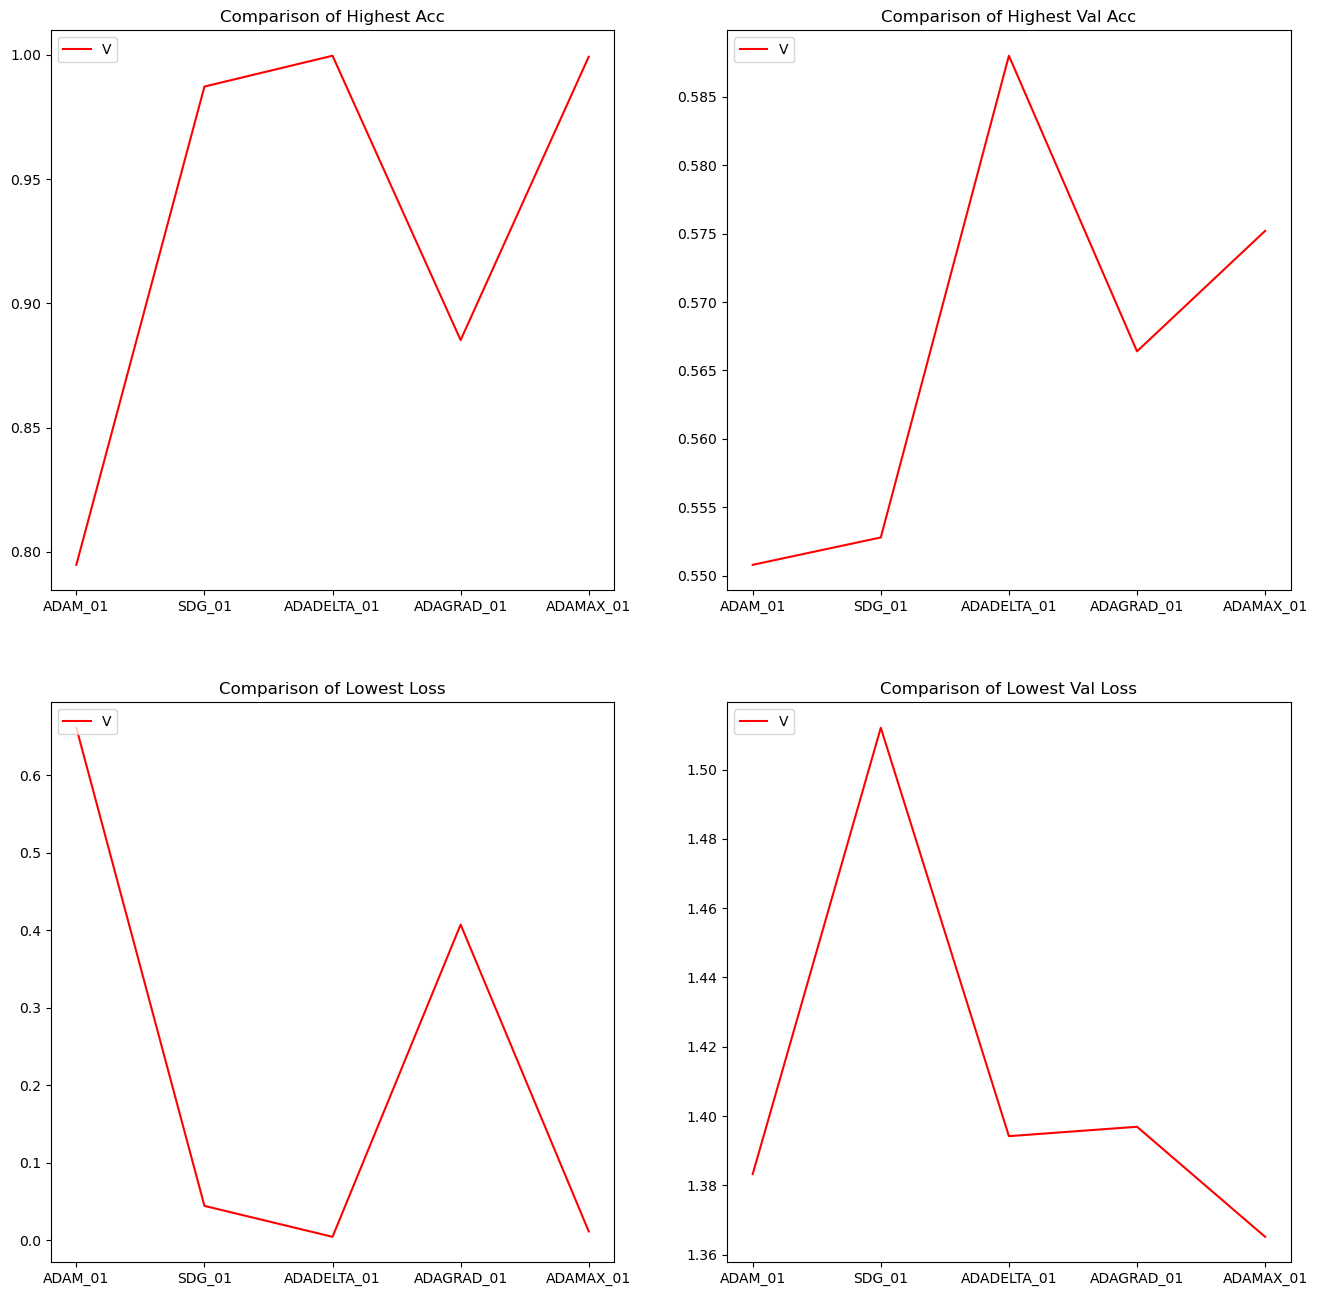

In [26]:
local_fig, compare_axes = pyplot.subplots(2, 2, figsize=(16, 16))

compare_axes[0, 0].plot(all_models, all_acc, color='red', label='Highest Acc')
compare_axes[0, 0].set_title('Comparison of Highest Acc')
compare_axes[0, 0].legend('Value', loc='upper left')

compare_axes[0, 1].plot(all_models, all_val_acc, color='red', label='Highest Val Acc')
compare_axes[0, 1].set_title('Comparison of Highest Val Acc')
compare_axes[0, 1].legend('Value', loc='upper left')

compare_axes[1, 0].plot(all_models, all_loss, color='red', label='Lowest Loss')
compare_axes[1, 0].set_title('Comparison of Lowest Loss')
compare_axes[1, 0].legend('Value', loc='upper left')

compare_axes[1, 1].plot(all_models, all_val_loss, color='red', label='Lowest Val Loss')
compare_axes[1, 1].set_title('Comparison of Lowest Val Loss')
compare_axes[1, 1].legend('Value', loc='upper left')

pyplot.show()

## Jak widać najlepszym okazał się być ADAMAX, dlatego to właśnie jego będę modyfikował dalej.

In [27]:
ModelADAMAX_02 = models.Sequential()
ModelADAMAX_02.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
ModelADAMAX_02.add(layers.MaxPooling2D((2, 2)))
ModelADAMAX_02.add(layers.Conv2D(64, (3, 3), activation='relu'))
ModelADAMAX_02.add(layers.MaxPooling2D((2, 2)))
ModelADAMAX_02.add(layers.Conv2D(128, (3, 3), activation='relu'))
ModelADAMAX_02.add(layers.MaxPooling2D((2, 2)))
ModelADAMAX_02.add(layers.Flatten())
ModelADAMAX_02.add(layers.Dense(256, activation='relu'))
ModelADAMAX_02.add(layers.Dense(10, activation='softmax'))

ModelADAMAX_02.summary()

ModelADAMAX_02.compile(
    loss='categorical_crossentropy',
    optimizer=Adamax(learning_rate=0.002),
    metrics=['acc']
)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 10, 10, 128)     

In [28]:
testDataGenADAMAX_02 = ImageDataGenerator(rescale=1. / 255)

trainDataGenADAMAX_02 = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,
    width_shift_range=0.10,
    height_shift_range=0.10,
    shear_range=0.10,
    zoom_range=0.10,
    horizontal_flip=True, 
    fill_mode='nearest'
)

trainGeneratorADAMAX_02 = trainDataGenADAMAX_02.flow_from_directory(
    trainDirectory,
    target_size=(img_rows, img_cols),
    batch_size=_globalBatchSize,
    class_mode='categorical'
)

validationGeneratorADAMAX_02 = testDataGenADAMAX_02.flow_from_directory(
    validationDirectory,
    target_size=(img_rows, img_cols),
    batch_size=_globalBatchSize,
    class_mode='categorical'
)

historyADAMAX_02 = ModelADAMAX_02.fit(
    trainGeneratorADAMAX_02,
    steps_per_epoch=_globalStepsPerEpoch,
    epochs=_globalEpochAmount,
    validation_data=validationGeneratorADAMAX_02,
    validation_steps=_globalValidationSteps
)

Found 5300 images belonging to 10 classes.
Found 2950 images belonging to 10 classes.
Epoch 1/30
100/100 [==============================] - 15s 143ms/step - loss: 2.2504 - acc: 0.1848 - val_loss: 2.1246 - val_acc: 0.2480
Epoch 2/30
100/100 [==============================] - 14s 141ms/step - loss: 1.9995 - acc: 0.2968 - val_loss: 1.9741 - val_acc: 0.2840
Epoch 3/30
100/100 [==============================] - 14s 141ms/step - loss: 1.8442 - acc: 0.3480 - val_loss: 2.0645 - val_acc: 0.2764
Epoch 4/30
100/100 [==============================] - 14s 141ms/step - loss: 1.7386 - acc: 0.3808 - val_loss: 1.8442 - val_acc: 0.3724
Epoch 5/30
100/100 [==============================] - 14s 141ms/step - loss: 1.6882 - acc: 0.4104 - val_loss: 2.0796 - val_acc: 0.3252
Epoch 6/30
100/100 [==============================] - 14s 142ms/step - loss: 1.6294 - acc: 0.4308 - val_loss: 1.8955 - val_acc: 0.3560
Epoch 7/30
100/100 [==============================] - 14s 143ms/step - loss: 1.5603 - acc: 0.4548 - val_

32/32 [==============================] - 1s 24ms/step


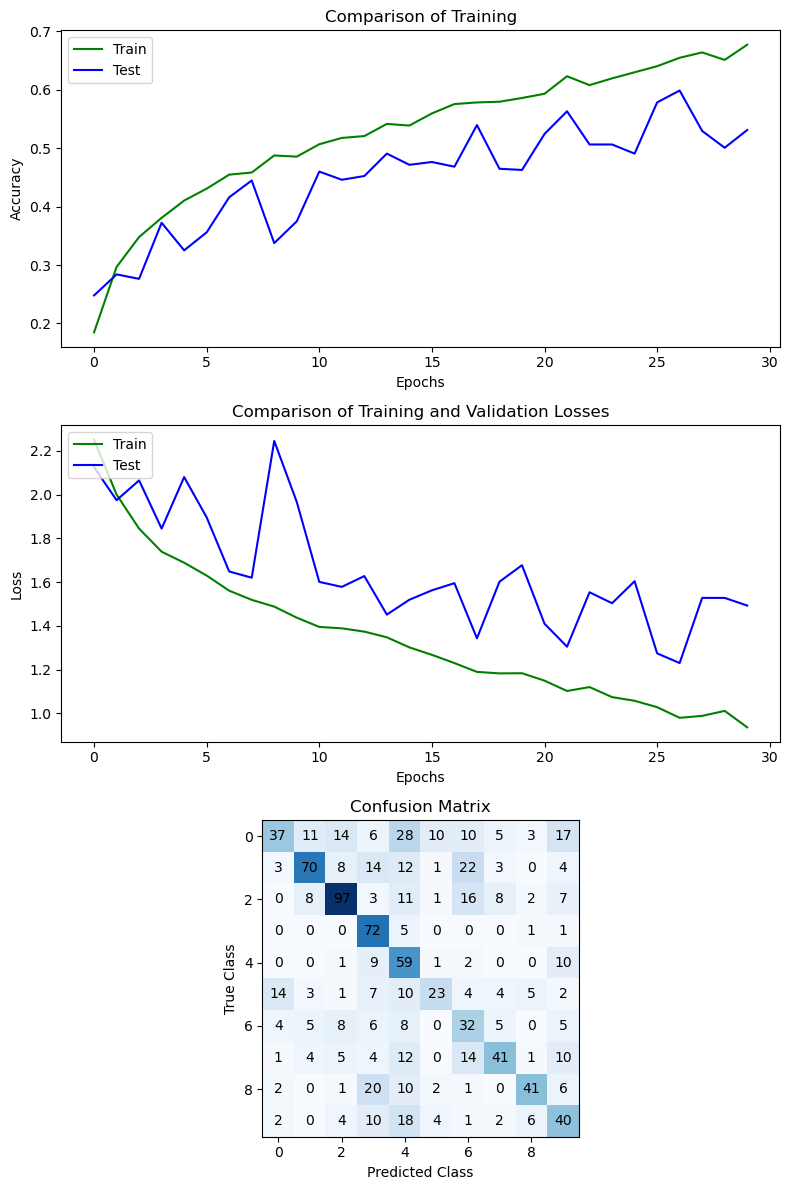

In [29]:
ModelADAMAX_02.save(modelsDirectory + saveFileName.format('ADAMAX_01'))

accuracyADAMAX_02 = historyADAMAX_02.history['acc']
val_accuracyADAMAX_02 = historyADAMAX_02.history['val_acc']
lossADAMAX_02 = historyADAMAX_02.history['loss']
val_lossADAMAX_02 = historyADAMAX_02.history['val_loss']

confusion_matrixADAMAX_02 = new_confusion_matrix(ModelADAMAX_02, validationGeneratorADAMAX_02)

plot_accuracy(
    accuracyADAMAX_02,
    val_accuracyADAMAX_02,
    lossADAMAX_02,
    val_lossADAMAX_02,
    confusion_matrixADAMAX_02,
    lab='ADAMAX_02'
)

# History
all_models.append('ADAMAX_02')
all_acc.append(max(historyADAMAX_02.history['acc']))
all_loss.append(min(historyADAMAX_02.history['loss']))
all_val_acc.append(max(historyADAMAX_02.history['val_acc']))
all_val_loss.append(min(historyADAMAX_02.history['val_loss']))

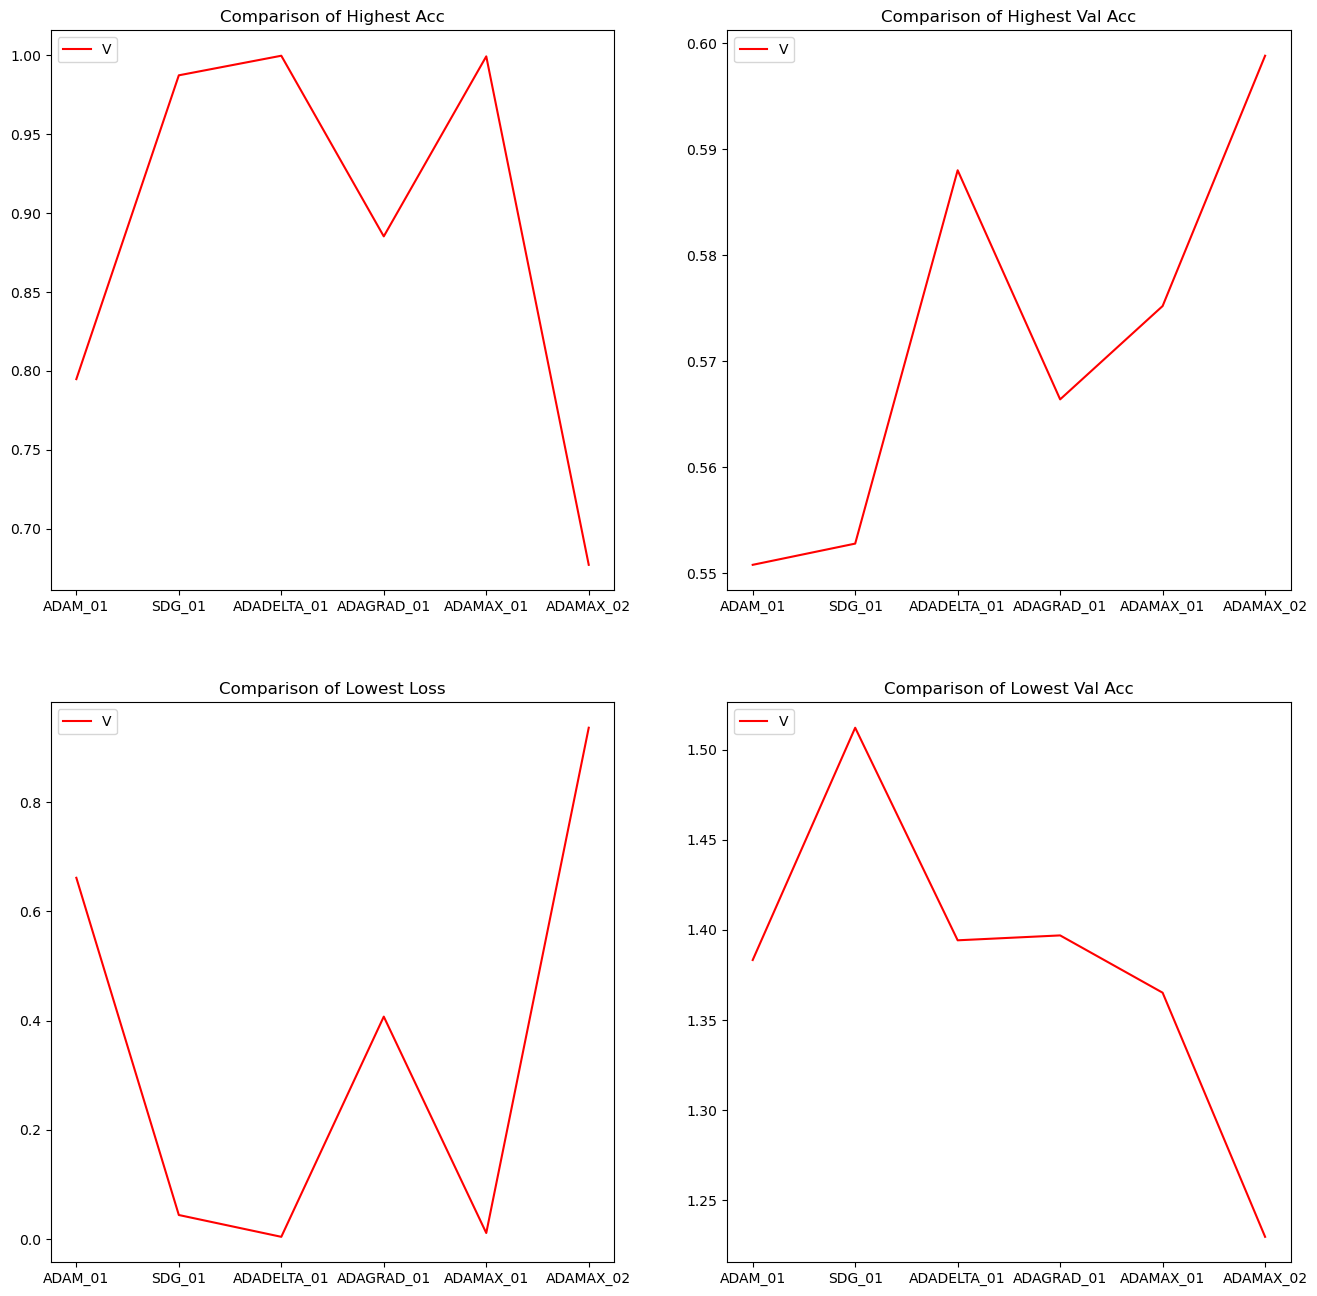

In [30]:
local_fig, compare_axes = pyplot.subplots(2, 2, figsize=(16, 16))

compare_axes[0, 0].plot(all_models, all_acc, color='red', label='Highest Acc')
compare_axes[0, 0].set_title('Comparison of Highest Acc')
compare_axes[0, 0].legend('Value', loc='upper left')

compare_axes[0, 1].plot(all_models, all_val_acc, color='red', label='Highest Val Acc')
compare_axes[0, 1].set_title('Comparison of Highest Val Acc')
compare_axes[0, 1].legend('Value', loc='upper left')

compare_axes[1, 0].plot(all_models, all_loss, color='red', label='Lowest Loss')
compare_axes[1, 0].set_title('Comparison of Lowest Loss')
compare_axes[1, 0].legend('Value', loc='upper left')

compare_axes[1, 1].plot(all_models, all_val_loss, color='red', label='Lowest Val Loss')
compare_axes[1, 1].set_title('Comparison of Lowest Val Acc')
compare_axes[1, 1].legend('Value', loc='upper left')